**Panggil Libraries yang digunakan**

In [ ]:
import pandas as pd # sebagai dataframe
import matplotlib.pyplot as plt # sebagai visualisasi
import seaborn as sns # sebagai visualisasi
from sklearn.model_selection import train_test_split # sebagai pembagi dataset untuk train dan test
from sklearn.linear_model import LinearRegression # metode yang digunakan

# metrik yang digunakan 
from sklearn.metrics import mean_absolute_error 

In [ ]:
# Membaca dan memanggil dataset

df = pd.read_excel('/content/datass.xlsx')

df.head()

,bulan,luas_ha,jml_pkk,tdn/pkk,bjr,hasil_produksi
0,jan_19,24.59,2628,0.571020,22.225194,33352.015324
1,jan_19,25.07,2810,0.650000,24.645710,45015.388866
2,jan_19,23.02,2578,0.495252,23.223433,29650.750627
3,jan_19,16.89,1479,0.644354,23.149003,22061.000000
4,jan_19,11.29,905,1.312155,21.170306,25139.737991


In [ ]:
# cek apakah ada data yang kosong

df.isna().sum()

bulan             0
luas_ha           0
jml_pkk           0
tdn/pkk           0
bjr               0
hasil_produksi    0
dtype: int64

In [ ]:
# Cek tipe data dari masisng-masing variabel

df.dtypes

bulan              object
luas_ha           float64
jml_pkk             int64
tdn/pkk           float64
bjr               float64
hasil_produksi    float64
dtype: object

In [ ]:
# cek statistik

df.describe()

,luas_ha,jml_pkk,tdn/pkk,bjr,hasil_produksi
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000
mean,22.446774,3013.838710,1.420861,11.199674,38987.412136
std,11.828467,1689.989077,0.604438,5.593594,26028.788515
min,3.080000,391.000000,0.257830,5.208164,4541.498182
25%,11.290000,1370.000000,0.928434,7.495626,18043.260845
50%,24.590000,2810.000000,1.417245,8.451483,34535.431325
75%,31.770000,4477.000000,1.781599,13.485900,53186.700000
max,45.680000,5936.000000,3.881579,29.154616,185247.625727


Text(0.5, 1.0, 'Correlation Matrix')

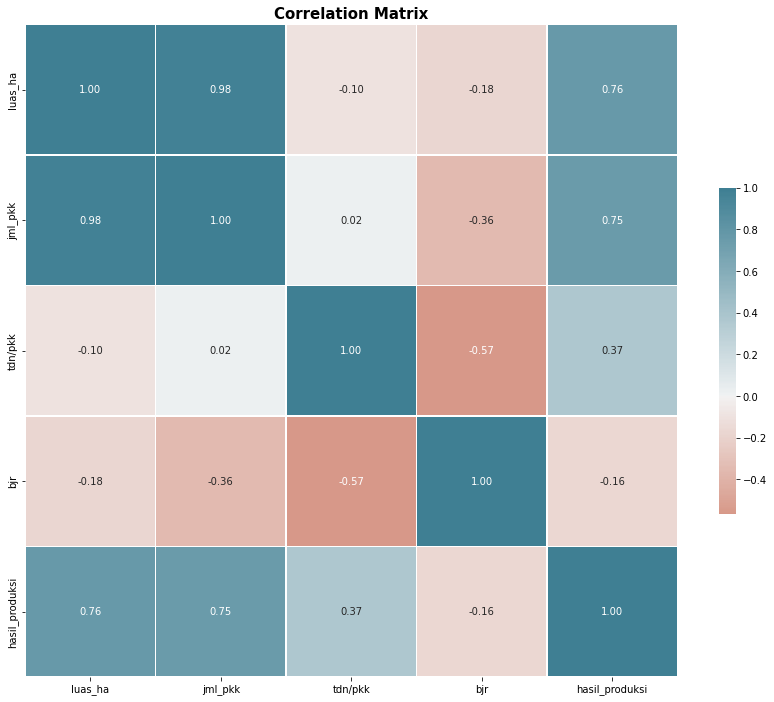

In [ ]:
# membuat korelasi antar variabel
corr = df.corr()

plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix",size=15, weight='bold')

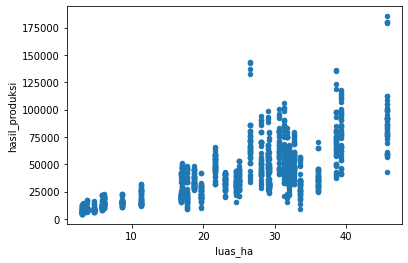

In [ ]:
# visualisasi input(luas_ha) dan output(hasil_produksi)

df.plot(kind='scatter', x='luas_ha', y='hasil_produksi')

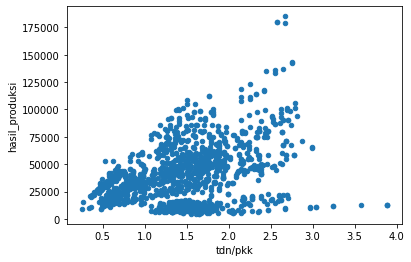

In [ ]:
# visualisasi input(tdn/pkk) dan output(hasil_produksi)

df.plot(kind='scatter', x='tdn/pkk', y='hasil_produksi')

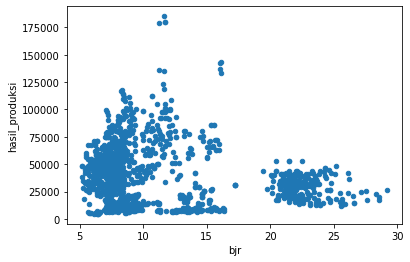

In [ ]:
# visualisasi input(bjr) dan output(hasil_produksi)

df.plot(kind='scatter', x='bjr', y='hasil_produksi')

In [ ]:
# menentukan X dan Y untuk dilakukan pembagian dataset berupa train 80% dan test 20%

X = df[['luas_ha',	'jml_pkk',	'tdn/pkk',	'bjr']] # variabel input
y = df['hasil_produksi'] # variabel output

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
# menampilkan hasil dari pembagian dataset train dan test

print('Jumlah data train = ' ,X_train.shape)
print('Jumlah data test = ' ,X_test.shape)

Jumlah data train =  (1190, 4)
Jumlah data test =  (298, 4)


In [ ]:
# isi dari data x train

X_train

,luas_ha,jml_pkk,tdn/pkk,bjr
1062,45.68,5936,1.454751,9.122792
607,31.31,4207,2.795032,8.639848
1444,31.31,4207,1.225814,7.884429
464,19.74,2165,0.833025,17.221172
335,21.66,3206,1.868247,8.139002
...,...,...,...,...
715,23.02,2578,0.667207,22.726562
905,26.51,3231,1.609068,15.308475
1096,36.08,5239,0.663275,8.124331
235,31.31,4207,2.795032,8.984830


In [ ]:
# isi dari data x test

X_test

,luas_ha,jml_pkk,tdn/pkk,bjr
91,18.77,2778,1.827934,6.495549
1103,31.31,4207,1.334229,7.546472
909,29.21,4156,0.991578,7.670978
683,25.07,2810,0.489680,21.995086
561,16.89,1479,0.674429,22.963415
...,...,...,...,...
1117,25.07,2810,0.600000,24.805710
1124,45.68,5936,0.924360,10.566794
12,8.70,1370,1.474453,7.228047
531,11.29,905,1.495580,24.504251


In [ ]:
# isi dari data y train

y_train

1062     78778.957055
607     101593.384179
1444     40660.000000
464      31058.383743
335      48749.363909
            ...      
715      39091.051094
905      86190.000000
1096     28231.236872
235     105649.917887
1061      8818.406667
Name: hasil_produksi, Length: 1190, dtype: float64

In [ ]:
# isi dari data y test

y_test

91      32984.400000
1103    42359.102406
909     31200.000000
683     30265.238329
561     22905.546829
            ...     
1117    41822.426646
1124    57980.000000
12      14600.654424
531     26730.000000
73      30903.200000
Name: hasil_produksi, Length: 298, dtype: float64

In [ ]:
# Membuat model regresi dan melatih berdasarkan x_train dan y_train

linreg = LinearRegression().fit(X_train,y_train)

# menampilkan coeficient dan intercept
print(linreg.coef_)
print(linreg.intercept_)

[ 2.68036123e+03 -5.14771552e+00  2.93023789e+04  1.47939421e+03]
-63747.87883978267


In [ ]:
# menentukan y train pada model yang sudah dibuat
y_train_pred = linreg.predict(X_train)

# menentukan y test pada model yang sudah dibuat
y_test_pred = linreg.predict(X_test)

In [ ]:
# Hasil Metrik dari Mean Absolute Error
print("MAE Training : ", mean_absolute_error(y_train,y_train_pred))
print("MAE Testing : ", mean_absolute_error(y_test,y_test_pred))

MAE Training :  6613.68057525481
MAE Testing :  6338.743930003388


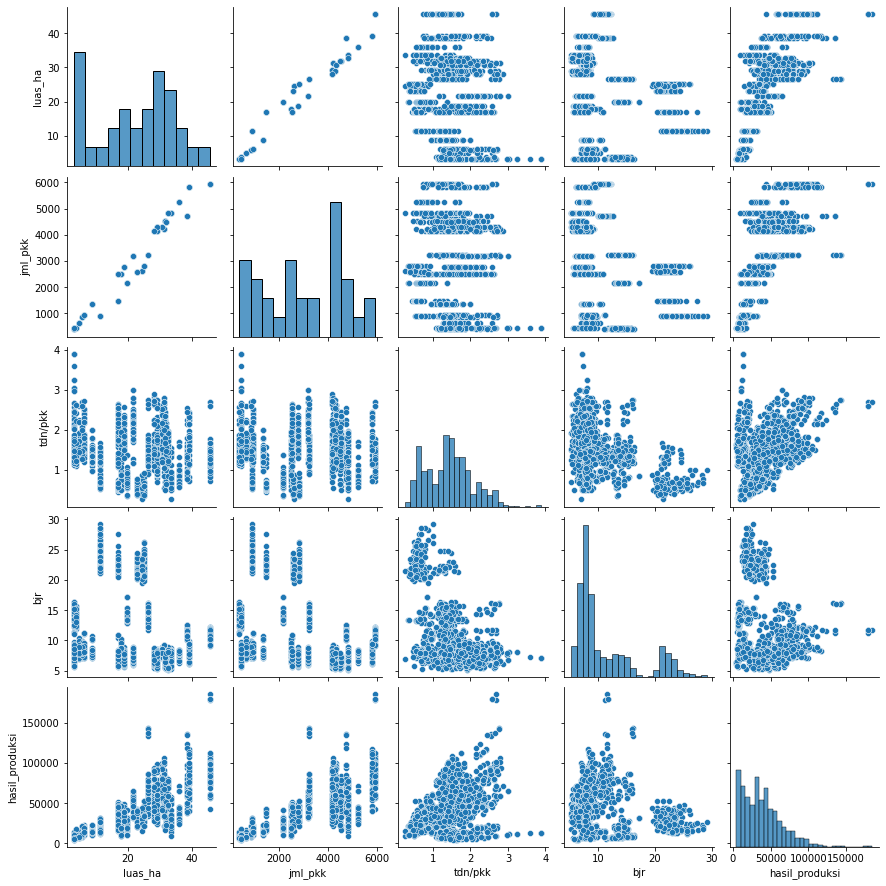

In [ ]:
# menampilkan visualisasi semua variabel

sns.pairplot(df)

In [ ]:
# menampilkan data aktual dan data hasil prediksi

y_pred = linreg.predict(X_test)
dataframe = pd.DataFrame({'Data_Sebenarnya' : y_test, 'Data_Prediksi' : y_pred})
dataframe

,Data_Sebenarnya,Data_Prediksi
91,32984.400000,35434.433666
1103,42359.102406,48778.073053
909,31200.000000,33555.574456
683,30265.238329,35871.880010
561,22905.546829,27644.258089
...,...,...
1117,41822.426646,43262.547304
1124,57980.000000,70852.579243
12,14600.654424,6416.991466
531,26730.000000,41930.219538


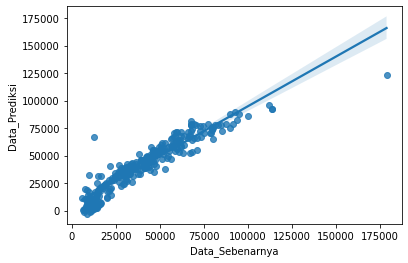

In [ ]:
# Menampilkan visualisasi dari data aktual dan data hasil prediksi

sns.regplot(x=dataframe['Data_Sebenarnya'], y=dataframe['Data_Prediksi'])